# Python e API

### O que é uma API?

- É um conjunto de códigos para usar um serviço/site/aplicativo específico. Cada site/ferramenta tem sua própria API. É importante que você saiba ler as APIs que precisar para saber usar

- Um dos padrões mais comuns em API é pegar informações em formato json, uma espécie de dicionário que precisa ser tratada no Python para podermos analisar

- As possibilidades de API são infinitas, vamos fazer 2 exemplos aqui: Cotação de Moedas e Envio de SMS.

- Sites como Google, Youtube, Facebook, Twitter, ArcGis e praticamente qualquer ferramenta/site grande tem uma API.

### O que precisamos:

- Quase sempre você precisa de uma conta para consumir uma API. Algumas APIs são abertas, como a https://docs.awesomeapi.com.br/api-de-moedas , mas em muitos casos (como veremos no caso do SMS) vamos precisar ter uma conta ativa para consumir a API

- A Documentação da API (ou exemplos da internet) é a chave para conseguir usar uma API 

#### Pegar a Cotação Atual de Todas as Moedas 

In [46]:
import requests
import json

cotacoes = requests.get('https://economia.awesomeapi.com.br/json/all')
cotacaoes_dic = cotacaoes.json()
print(cotacaoes_dic)

# cotacoes_usd = requests.get('https://economia.awesomeapi.com.br/json/last/USD-BRL,EUR-BRL')
# print(cotacoes_usd)



{'USD': {'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '4.9563', 'low': '4.9008', 'varBid': '0.032', 'pctChange': '0.65', 'bid': '4.9412', 'ask': '4.9419', 'timestamp': '1681752826', 'create_date': '2023-04-17 14:33:46'}, 'USDT': {'code': 'USD', 'codein': 'BRLT', 'name': 'Dólar Americano/Real Brasileiro Turismo', 'high': '4.98', 'low': '4.92', 'varBid': '0.025', 'pctChange': '0.51', 'bid': '4.82', 'ask': '5.11', 'timestamp': '1681752360', 'create_date': '2023-04-17 14:26:00'}, 'CAD': {'code': 'CAD', 'codein': 'BRL', 'name': 'Dólar Canadense/Real Brasileiro', 'high': '3.6992', 'low': '3.6675', 'varBid': '0.0146', 'pctChange': '0.4', 'bid': '3.6867', 'ask': '3.6889', 'timestamp': '1681752824', 'create_date': '2023-04-17 14:33:44'}, 'GBP': {'code': 'GBP', 'codein': 'BRL', 'name': 'Libra Esterlina/Real Brasileiro', 'high': '6.1308', 'low': '6.076', 'varBid': '0.0199', 'pctChange': '0.33', 'bid': '6.1129', 'ask': '6.1155', 'timestamp': '1681752825', 'cre

#### Qual foi a última cotação do Dólar, do Euro e do BitCoin? (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [47]:
print('Dolar: {}'.format(cotacaoes_dic['USD']['bid']))
print('Euro: {}'.format(cotacaoes_dic['EUR']['bid']))
print('bitcoin: {}'.format(cotacaoes_dic['BTC']['bid']))


Dolar: 4.9412
Euro: 5.3968
bitcoin: 146999


#### Pegar a cotação dos últimos 30 dias do dólar (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [48]:
cotacoes_dolar30d = requests.get('https://economia.awesomeapi.com.br/json/daily/USD-BRL/30')
cotacaoes_dolar_dic = cotacoes_dolar30d.json()
lista_cotacoes_dolar = [float(item['bid']) for item in cotacaoes_dolar_dic]
print(lista_cotacoes_dolar)

# print(cotacaoes_dolar_dic[0]['bid'])

# for item in cotacaoes_dolar_dic:
#     print(item['bid'])


[4.9296, 4.9065, 4.907, 4.9275, 4.9176, 5.0049, 5.0662, 5.0549, 5.0549, 5.0549, 5.0594, 5.034, 5.0692, 5.0619, 5.0629, 5.0624, 5.094, 5.1351, 5.1655, 5.1983, 5.2459, 5.2979, 5.2369, 5.2424, 5.2368, 5.2748, 5.2793, 5.2798, 5.2307, 5.288]


#### Pegar as cotações do BitCoin de Jan/20 a Out/20

In [77]:
cotacoes_btc = requests.get('https://economia.awesomeapi.com.br/BTC-BRL/90?start_date=20230101&end_date=20230414')
cotacoes_btc_dic = cotacoes_btc.json()
lista_cotacoes_btc = [item['bid'] for item in cotacoes_btc_dic]
lista_cotacoes_btc.reverse()
print(lista_cotacoes_btc)
print(len(lista_cotacoes_btc))










['150329', '150265', '150273', '150290', '150279', '150448', '150469', '150500', '150500', '150500', '150530', '150530', '150559', '150559', '150523', '150571', '150590', '150662', '150662', '150552', '150400', '150400', '150444', '150448', '150461', '150461', '150319', '150371', '150376', '150376', '150376', '150327', '150330', '150351', '150361', '150366', '150369', '150372', '150372', '150315', '150300', '150300', '150300', '150300', '150300', '150354', '150300', '150303', '150300', '150316', '150346', '150385', '150391', '150388', '150303', '150345', '150379', '150375', '150380', '150372', '150371', '150351', '150382', '150382', '150367', '150376', '150243', '150243', '150243', '150200', '150200', '150221', '150238', '150223', '150223', '150223', '150200', '150232', '150209', '150200', '150200', '150200', '150243', '150243', '150327', '150305', '150518', '150528', '150528', '150516']
90


#### Gráfico com as cotações do BitCoin

<function matplotlib.pyplot.show(close=None, block=None)>

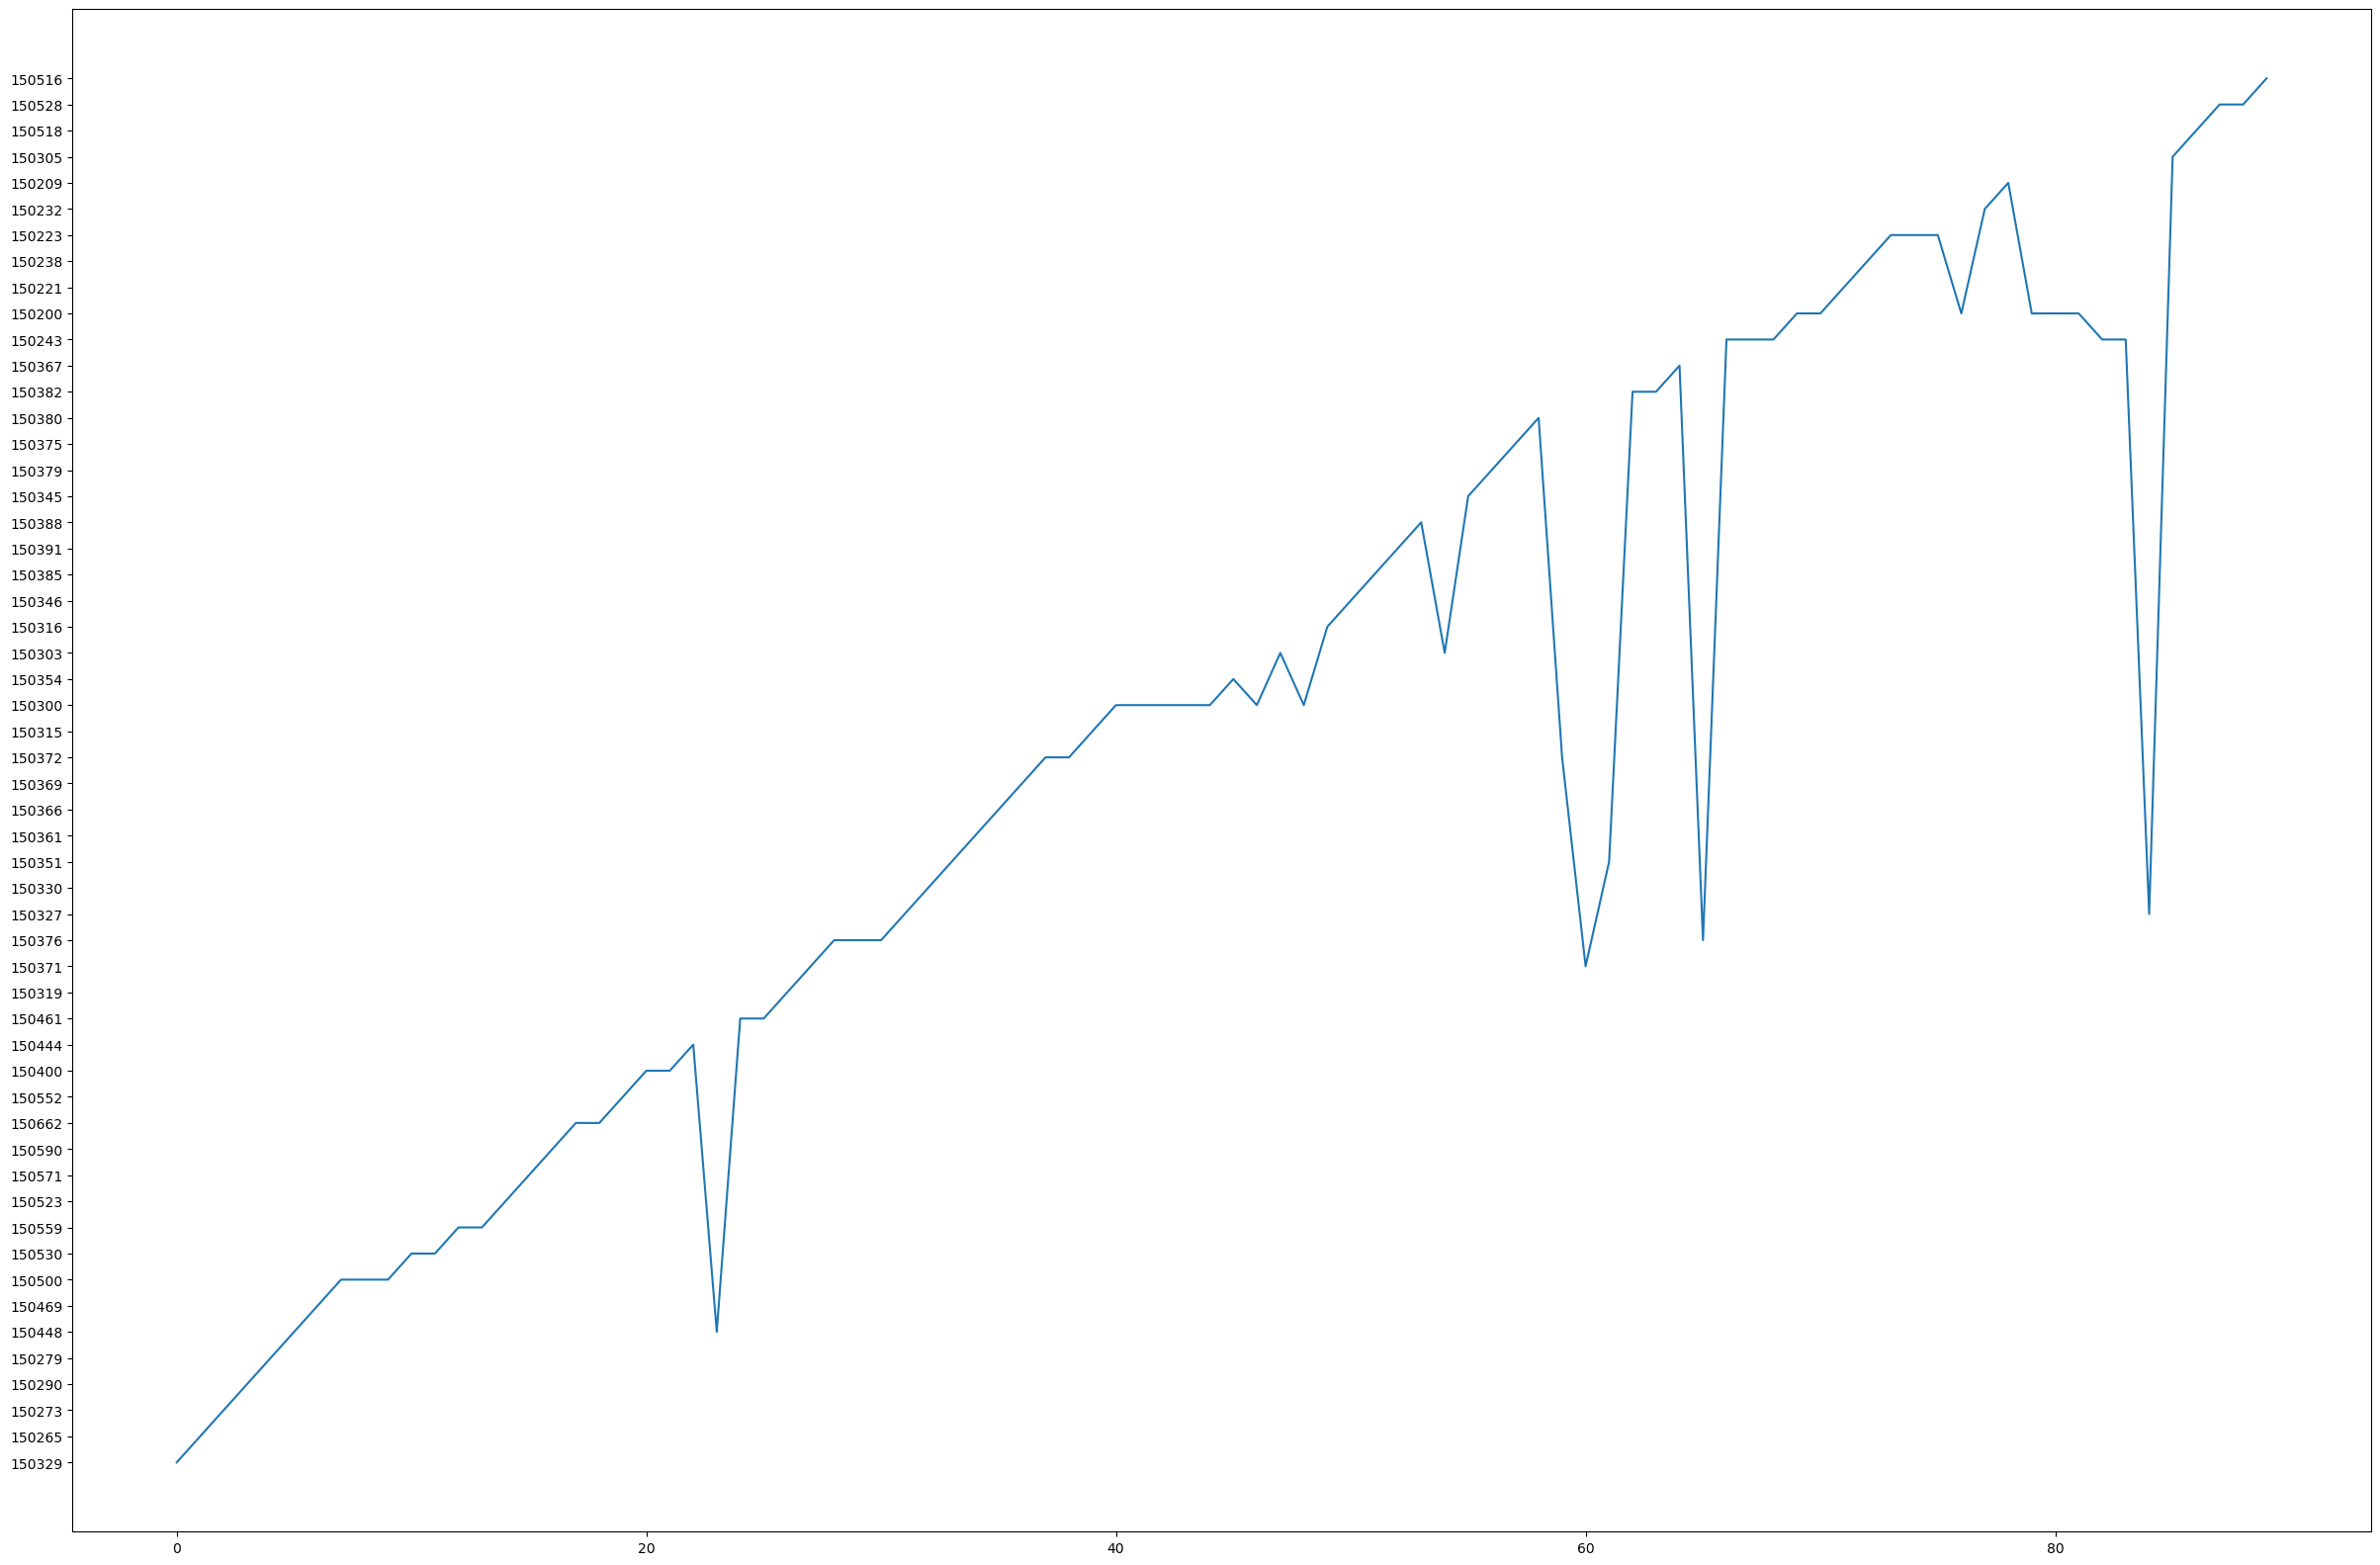

In [78]:
import matplotlib.pyplot as plt


plt.figure(figsize=(30, 20))
plt.plot(lista_cotacoes_btc)
plt.show